In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
from scipy.optimize import fsolve
from scipy.integrate import odeint, quad
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.optimize import minimize_scalar as sc
import os
from spectrum_class import Spectrum
from molarity_class import Molarity
from diagnostic_class import Diagnostic
import spectrochempy as scp
import re
from scipy.interpolate import griddata
import re
import glob
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# ----- Obtain the path to the spa folder
path = os.path.dirname(os.getcwd())

folder_path = path + '\\Test_6_3_24\\'
file_list = glob.glob(os.path.join(folder_path, '*.spa'))

In [3]:
def extract_x_position(filename):
    match = re.search(r'X\s*=\s*(\d+)-\d+', filename)
    if match:
        return int(match.group(1))
    return None

In [23]:
datasets = [scp.read_spa(file) for file in file_list]
x_positions = [extract_x_position(file) for file in file_list]
sorted_datasets = [ds for _, ds in sorted(zip(x_positions, datasets), key=lambda x: x[0])]
keys = sorted(x_positions)

In [26]:
data_dict = {}

i = 0
for i in range(len(keys)):
    data_dict[keys[i]] = sorted_datasets[i]

{938: NDDataset: [float64] a.u. (shape: (y:1, x:6950)), 944: NDDataset: [float64] a.u. (shape: (y:1, x:6950)), 952: NDDataset: [float64] a.u. (shape: (y:1, x:6950)), 962: NDDataset: [float64] a.u. (shape: (y:1, x:6950)), 969: NDDataset: [float64] a.u. (shape: (y:1, x:6950)), 981: NDDataset: [float64] a.u. (shape: (y:1, x:6950)), 992: NDDataset: [float64] a.u. (shape: (y:1, x:6950)), 1001: NDDataset: [float64] a.u. (shape: (y:1, x:6950)), 1015: NDDataset: [float64] a.u. (shape: (y:1, x:6950)), 1034: NDDataset: [float64] a.u. (shape: (y:1, x:6950))}


In [28]:
# create Molarity objects from the dictionary
keys = list(data_dict.keys())
Molarities = []
for i in range(len(data_dict)):
    # select an NDDataset object, create a Molarity object
    a = Molarity(obj = data_dict[keys[i]],M = keys[i],smooth = 2.0)

    # add to the list of Molarity arrays
    Molarities.append(a)

In [39]:
# ----- Exporting the data to a .csv file
# getting the x data
wavenumbers = Molarities[0].get_x()

test_csv = np.array([])
test_csv = np.append(test_csv,wavenumbers)

titles = np.array(['Time'])

# getting the y data
for i in range(len(Molarities)):
    # load the data
    working_object = Molarities[i]
    working_array = working_object.get_all()
    M = working_object.get_M()

    # nested for loop, to parse through the Spectrum objects
    for j in range(len(working_array)):
        working_spectrum = working_array[j]
        working_absorbance = working_spectrum.get_y()

        # append to the array
        test_csv = np.vstack((test_csv,working_absorbance))
        #Add in the appropriate time interval for each spectrum here
        titles = np.append(titles,40+40*i)

# transpose
test_csv = test_csv.T


# create pandas dataframe for easy exporting
test_csv_pd = pd.DataFrame(test_csv,columns = titles)
test_csv_pd.set_index('Time', inplace=True)


# output
display(test_csv_pd)

,40,80,120,160,200,240,280,320,360,400
Time,,,,,,,,,,
4000.000,1.281662,1.167895,1.212407,1.263483,1.134934,1.141013,1.192197,1.301257,1.171991,1.188610
3999.518,1.281577,1.167838,1.212411,1.263472,1.134910,1.141027,1.192239,1.301213,1.172046,1.188495
3999.036,1.281048,1.167418,1.212367,1.263518,1.134757,1.141169,1.192557,1.301032,1.172467,1.187803
3998.554,1.280689,1.167079,1.212219,1.263662,1.134624,1.141322,1.192843,1.301104,1.172842,1.187436
3998.072,1.280501,1.166914,1.212047,1.263792,1.134527,1.141448,1.193064,1.301476,1.173107,1.187445
...,...,...,...,...,...,...,...,...,...,...
651.928,1.292438,1.349674,1.311970,1.276575,1.325119,1.332512,1.364848,1.289911,1.346663,1.333524
651.446,1.292804,1.351843,1.313166,1.275512,1.324576,1.331540,1.363342,1.288349,1.351043,1.332002
650.964,1.293653,1.353627,1.313752,1.275530,1.324743,1.329430,1.361383,1.286568,1.355460,1.331969


In [41]:
test_csv_pd.to_csv(folder_path+"test_csv.csv")

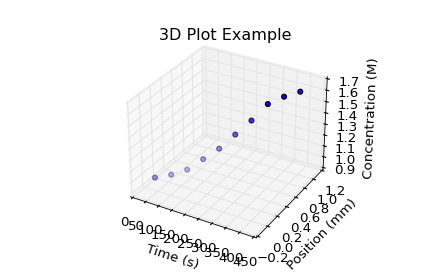

In [49]:
Z = np.array([1,1.01,1.04,1.12,1.2,1.31,1.42,1.55,1.6,1.63]) #Concentrations
Y = np.linspace(0,1,10) #Position
X = np.linspace(40,400,10) #Time
#3D plotting practice
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,Z)
ax.set_zlabel('Concentration (M)')
ax.set_ylabel('Position (mm)')
ax.set_xlabel('Time (s)')
ax.set_title('3D Plot Example')
plt.show()